In [1]:
import cv2
import torch, matplotlib
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
matplotlib.rc('image', cmap = 'gray')
import imageio
import pylab as pl
from PIL import Image
from skimage import data


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Image size:  torch.Size([194, 259, 3])


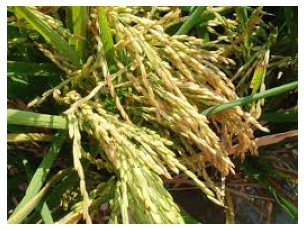

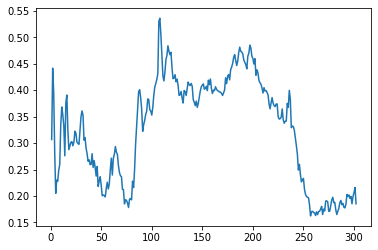

[0.3067538  0.44183013 0.39581698 0.2839506  0.20490195 0.23006536
 0.22792633 0.24917045 0.25969502 0.33498913 0.36828345 0.35381263
 0.3329355  0.2759875  0.37575758 0.3909849  0.32589588 0.28767183
 0.29433548 0.30151007 0.30280867 0.29491648 0.3019608  0.32245186
 0.31883267 0.3018052  0.29931453 0.29776108 0.32433155 0.34960914
 0.36089104 0.35321355 0.30566037 0.31049192 0.29099873 0.28005412
 0.26574934 0.2683266  0.25930282 0.2597405  0.27998754 0.25390694
 0.26689076 0.25429717 0.23762202 0.25570497 0.21802905 0.22855447
 0.23633659 0.21964052 0.20037118 0.20198332 0.20075165 0.19830835
 0.2142616  0.22606783 0.2132783  0.22317573 0.24976565 0.27152777
 0.23951086 0.2713648  0.27892867 0.2934464  0.28283185 0.2787979
 0.25788632 0.2447557  0.23826712 0.23671025 0.2126162  0.21188356
 0.18499067 0.19302467 0.19150896 0.1868006  0.17815126 0.19379361
 0.19518955 0.19265234 0.22799325 0.2158383  0.24996708 0.29802918
 0.33057794 0.3627022  0.39730874 0.40099737 0.38609228 0.36464

In [4]:
def display_image(img):
  plt.figure(); plt.imshow(img)
  plt.grid(False);  plt.axis('off'); plt.show()

path = "/content/drive/My Drive/IDW Hackthn/seed.jpg"



img = imageio.imread(path)
# Transform into pytorch tensor.
img = torch.tensor(img, dtype=torch.float) / 255.0  

# Show the image size.
print('Image size: ', img.shape)
display_image(img)


# get some image
#image = data.coins()
image = img[:,0:303]

# create array of radii
x,y = np.meshgrid(np.arange(image.shape[1]),np.arange(image.shape[0]))
R = np.sqrt(x**2+y**2)

# calculate the mean
f = lambda r : image[(R >= r-.5) & (R < r+.5)].mean()
r  = np.linspace(1,302,num=302)
mean = np.vectorize(f)(r)

# plot it
fig,ax=plt.subplots()
ax.plot(r,mean)
plt.show()

x = np.array(mean)
mean = x[np.logical_not(np.isnan(x))] 
print(mean)
print(len(mean))
radius_mean = 0
for i in range(len(mean)): 
  radius_mean = radius_mean + mean[i]
radius_mean = radius_mean/len(mean)
perimeter_mean = 2*radius_mean*3.14
area_mean = 3.14*radius_mean*radius_mean
compactness  = ((perimeter_mean*perimeter_mean) / (area_mean - 1.0))
print('radius_mean :',radius_mean)
print('perimeter_mean :' ,perimeter_mean)
print('area_mean :' ,area_mean)
print('compactness :' ,compactness)

In [7]:
img = cv2.imread(path,0)
ret,thresh = cv2.threshold(img,10,250,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)
# display_image(img)
cnt = contours[0]
M = cv2.moments(cnt)
print(M)
concavity_points = len(M)
print("number of covcavity points : ",concavity_points)



cx = (M['m10']/M['m00'])
cy = (M['m01']/M['m00'])
print('cx : cy =',cx,':',cy)


concavity_mean = (cx +cy)/2
area = cv2.contourArea(cnt)
perimeter = cv2.arcLength(cnt,True)
print('area and perimeter of concavity ;',area,":", perimeter)
print('concavity_mean :',concavity_mean)

{'m00': 2.0, 'm10': 130.0, 'm01': 382.0, 'm20': 8450.333333333332, 'm11': 24830.0, 'm02': 72962.33333333333, 'm30': 549315.0, 'm21': 1614013.6666666667, 'm12': 4742551.666666667, 'm03': 13935933.0, 'mu20': 0.3333333333321207, 'mu11': 0.0, 'mu02': 0.3333333333284827, 'mu30': 2.3283064365386963e-10, 'mu21': 3.092281986027956e-10, 'mu12': 6.257323548197746e-10, 'mu03': 1.862645149230957e-09, 'nu20': 0.08333333333303017, 'nu11': 0.0, 'nu02': 0.08333333333212067, 'nu30': 4.1159031748919956e-11, 'nu21': 5.4664339041534314e-11, 'nu12': 1.1061489782522237e-10, 'nu03': 3.2927225399135965e-10}
number of covcavity points :  24
cx : cy = 65.0 : 191.0
area and perimeter of concavity ; 2.0 : 5.656854152679443
concavity_mean : 128.0


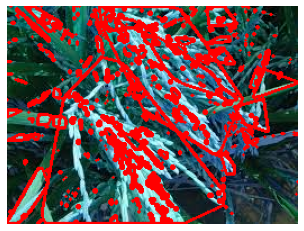

concave points: 524


In [8]:

# Load the image
img1 = cv2.imread(path)
# Convert it to greyscale
img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
# Threshold the image
ret, thresh = cv2.threshold(img,150,255,0)
# Find the contours
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# For each contour, find the convex hull and draw it
# on the original image.

for i in range(len(contours)):
    hull = cv2.convexHull(contours[i])
    cv2.drawContours(img1, [hull], -1, (255, 0, 0), 2)

# Display the final convex hull image
#cv2.imshow('ConvexHull', img1)
#cv2.waitKey(0)
def display_image(img):
  plt.figure(); plt.imshow(img)
  plt.grid(False);  plt.axis('off'); plt.show()
display_image(img1)
concave_points = len(contours) 
print('concave points:',concave_points)

259 194
(50246, 2)
======= Scale : 1.0069555500567189
======= Scale : 1.0784804316944516
======= Scale : 1.1550857845535842
======= Scale : 1.2371324786871727
======= Scale : 1.3250070170452075
======= Scale : 1.4191233562003824
======= Scale : 1.5199248564015158
======= Scale : 1.6278863701408692
======= Scale : 1.7435164790741244
======= Scale : 1.8673598898306263
The Hausdorff dimension is 1.9983518040362753


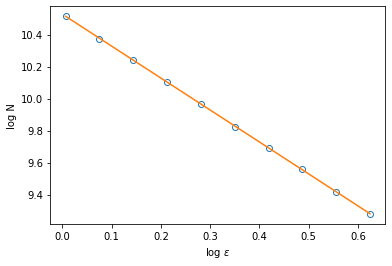

In [9]:
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray
 
image=rgb2gray(pl.imread(path))
 
# finding all the non-zero pixels
pixels=[]
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        if image[i,j]>0:
             pixels.append((i,j))
 
Lx=image.shape[1]
Ly=image.shape[0]
print (Lx, Ly)
pixels=pl.array(pixels)
print (pixels.shape)
 
# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)
Ns=[]
# looping over several scales
for scale in scales:
    print ("======= Scale :",scale)
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))
 
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')
pl.savefig('sierpinski_dimension.pdf')
fractal_dimension = -coeffs[0]
print ("The Hausdorff dimension is",fractal_dimension) #the fractal dimension is the OPPOSITE of the fitting coefficient
np.savetxt("scaling.txt", list(zip(scales,Ns)))

Circle: 0 - Center: (129, 96) - Radius: 161
Circle: 1 - Center: (33, 159) - Radius: 1
Circle: 2 - Center: (80, 158) - Radius: 1
Circle: 3 - Center: (175, 154) - Radius: 1
Circle: 4 - Center: (96, 152) - Radius: 1
Circle: 5 - Center: (90, 150) - Radius: 1
Circle: 6 - Center: (167, 149) - Radius: 1
Circle: 7 - Center: (43, 148) - Radius: 1
Circle: 8 - Center: (198, 147) - Radius: 1
Circle: 9 - Center: (82, 147) - Radius: 1
Circle: 10 - Center: (38, 146) - Radius: 1
Circle: 11 - Center: (1, 146) - Radius: 1
Circle: 12 - Center: (47, 145) - Radius: 1
Circle: 13 - Center: (79, 143) - Radius: 1
Circle: 14 - Center: (44, 143) - Radius: 1
Circle: 15 - Center: (20, 138) - Radius: 1
Circle: 16 - Center: (31, 136) - Radius: 1
Circle: 17 - Center: (30, 121) - Radius: 1
Circle: 18 - Center: (66, 117) - Radius: 1
Circle: 19 - Center: (255, 116) - Radius: 1
Circle: 20 - Center: (222, 116) - Radius: 1
Circle: 21 - Center: (227, 115) - Radius: 1
Circle: 22 - Center: (232, 114) - Radius: 1
Circle: 23 - 

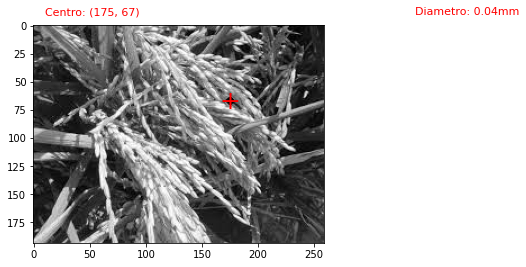

175.5 67.8170731707317 2.951219512195122
82


In [12]:
thresh = cv2.imread(path,0)
#thresh = thresh[:,0:303]
contours,hierarchy = cv2.findContours(thresh,2,1)

cnt = contours
x_mean = 0
y_mean = 0
radius_c = 0
for i in range (len(cnt)):
    (x,y),radius = cv2.minEnclosingCircle(cnt[i])
    c = (int(x),int(y))
    r = int(radius)
    x_mean = x_mean + int(x)
    y_mean = y_mean + int(y)
    radius_c = radius_c + int(radius)
    
    print ('Circle: ' + str(i) + ' - Center: ' + str(c) + ' - Radius: ' + str(r))
x_mean = x_mean/len(cnt)
y_mean = y_mean/len(cnt)
radius_c = radius_c/len(cnt)
center = (int(x_mean),int(y_mean))
radius = int(radius_c)
cv2.circle(thresh,center,radius,(0,255,0),2)
plt.text(x_mean-10, y_mean+6, '+', fontsize=25, color = 'red')
plt.text(10, -10, 'Centro: '+str(center), fontsize=11, color = 'red')
plt.text(340, -10, 'Diametro: '+str((radius*2)/100)+'mm', fontsize=11,     color = 'red')
plt.Circle((10, -10), 7.2, color='blue')
plt.imshow(thresh, cmap='gray')
#plt.savefig(IMG+'-diam.png')
plt.show()
print(x_mean,y_mean,radius_c)
contours_circle = len(contours)
print (contours_circle)

Mean: 90.339, Standard Deviation: 70.231


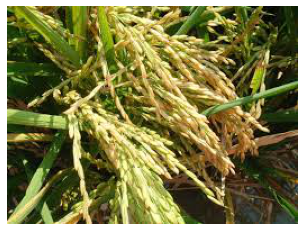

In [13]:
# load image
image = Image.open(path)
pixels = asarray(image)
# convert from integers to floats
pixels = pixels.astype('float32')
# calculate global mean and standard deviation
mean, std = pixels.mean(), pixels.std()
print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
# global standardization of pixels
#pixels = (pixels - mean) / std
# confirm it had the desired effect
#mean, std = pixels.mean(), pixels.std()
#print('Mean: %.3f, Standard Deviation: %.3f' % (mean, std))
display_image(image)

In [14]:
print('Image size                        :',img.shape[0],"*",img.shape[1])
resolution = img.shape[0]*img.shape[1]
print('Image_resolution                  :',resolution)
print('radius_mean                       :',radius_mean)
print('perimeter_mean                    :',perimeter_mean)
print('area_mean                         :',area_mean)
print('compactness                       :',compactness)
print('number of covcavity points        :',concavity_points)
print('cx : cy                           :',cx,':',cy)
print('area and perimeter of concavity   :',area,":", perimeter)
print('concavity_mean                    :',concavity_mean)
print('concave points                    :',concave_points)
print('The Hausdorff dimension is        :',fractal_dimension)
print('contours of x : y : radius        :',x_mean,":",y_mean,":",radius_c)
print('number of contours cirlce         :',contours_circle)
print('Mean texture: %.3f              Standard Deviation texture: %.3f' % (mean, std))

Image size                        : 194 * 259
Image_resolution                  : 50246
radius_mean                       : 0.32557242842304784
perimeter_mean                    : 2.0445948504967406
area_mean                         : 0.33283185530874115
compactness                       : -6.265838883258301
number of covcavity points        : 24
cx : cy                           : 65.0 : 191.0
area and perimeter of concavity   : 2.0 : 5.656854152679443
concavity_mean                    : 128.0
concave points                    : 524
The Hausdorff dimension is        : 1.9983518040362753
contours of x : y : radius        : 175.5 : 67.8170731707317 : 2.951219512195122
number of contours cirlce         : 82
Mean texture: 90.339              Standard Deviation texture: 70.231
